In [38]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load data

In [39]:
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train_normalize=x_Train4D/255
x_Test_normalize=x_Test4D/255

In [40]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

# Visualization function

In [41]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [42]:
def plot_images_labels_prediction(images,labels,prediction,idx,num):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        numn=25
    for i in range(0, num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.imshow

# CNN

In [12]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=1,padding="same",input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
train_history=model.fit(x_Train_normalize,y_TrainOneHot,epochs=10,batch_size=50,shuffle=True,verbose=1,validation_split=0.2)

/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3233 - acc: 0.8983 - val_loss: 0.0725 - val_acc: 0.9770
Epoch 2/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.1116 - acc: 0.9665 - val_loss: 0.0471 - val_acc: 0.9851
Epoch 3/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0852 - acc: 0.9742 - val_loss: 0.0458 - val_acc: 0.9858
Epoch 4/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0719 - acc: 0.9776 - val_loss: 0.0372 - val_acc: 0.9883
Epoch 5/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0654 - acc: 0.9806 - val_loss: 0.0342 - val_acc: 0.9894
Epoch 6/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0589 - acc: 0.9817 - val_loss: 0.0350 - val_acc: 0.9903
Epoch 7/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0535 - acc: 0.9836 - val_loss: 0.0359 - val_acc

# Save model

In [18]:
from keras.models import load_model
 
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        6416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
__________

# Plot

In [20]:
show_train_history(train_history,'acc','val_acc')

NameError: name 'train_history' is not defined

In [ ]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
print('accuracy=',scores[1])

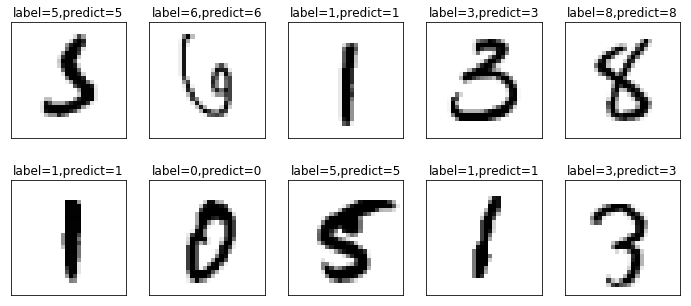

In [55]:
prediction=model.predict_classes(x_Test_normalize)
plot_images_labels_prediction(x_Test,y_Test,prediction,340,10)

# Output visualization

In [72]:
from keras import backend as K
model = load_model('my_model.h5') #replaced by your model name
layer_1 = K.function([model.layers[0].input], [model.layers[0].output])#第一个 model.layers[0],不修改,表示输入数据；第二个model.layers[you wanted],修改为你需要输出的层数的编号
f10 = layer_1([x_Test_normalize])[0]#只修改inpu_image
f1=f10[0,:,:,:]

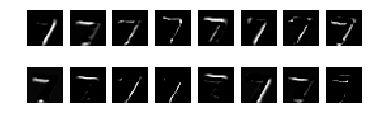

In [74]:
for _ in range(16):
            show_img = f1[:, :, _]
            show_img.shape = [28, 28]
            plt.subplot(4, 8, _ + 1)
            plt.imshow(show_img, cmap='gray')
            plt.axis('off')
plt.show()